#  Bank Loan Default Prediction & Analysis

# Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

os.makedirs("plots", exist_ok=True)
sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

# Create Sample Data

In [2]:
# Customers Table
customers = pd.DataFrame({
    "CustomerID": range(1, 11),
    "Name": ["Amit", "Priya", "Rohan", "Sneha", "Vikram", "Anjali", "Rahul", "Meera", "Karan", "Neha"],
    "Age": [28, 34, 40, 29, 45, 31, 38, 26, 50, 36],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "Income": [50000, 75000, 60000, 80000, 120000, 55000, 65000, 70000, 90000, 72000],
    "CreditScore": [720, 680, 650, 700, 750, 670, 640, 710, 690, 660],
    "EmploymentStatus": ["Salaried", "Self-Employed", "Salaried", "Salaried", "Business", "Salaried", "Self-Employed", "Salaried", "Business", "Salaried"]
})

# Loans Table
loans = pd.DataFrame({
    "LoanID": range(101, 111),
    "CustomerID": range(1, 11),
    "LoanAmount": [200000, 300000, 150000, 250000, 400000, 180000, 220000, 160000, 350000, 210000],
    "InterestRate": [7.5, 8.0, 9.0, 7.0, 6.5, 8.5, 9.2, 7.8, 6.8, 8.1],
    "Term": [36, 48, 24, 36, 60, 36, 48, 24, 60, 36],
    "Status": ["Approved"] * 10,
    "Default": ["No", "Yes", "No", "No", "Yes", "No", "Yes", "No", "Yes", "No"]
})

# Payments Table
payments = pd.DataFrame({
    "LoanID": np.repeat(range(101, 111), 3),
    "PaymentDate": pd.date_range(start="2024-01-01", periods=30, freq="MS"),
    "AmountPaid": np.random.randint(5000, 15000, size=30),
    "RemainingBalance": np.random.randint(10000, 200000, size=30)
})


# Merge Data for Analysis

In [3]:
df = loans.merge(customers, on="CustomerID")

# Default Rate Analysis

Default Rate (%)
Default
No     60.0
Yes    40.0
Name: proportion, dtype: float64


C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_17008\2862172353.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Default", data=df, palette="coolwarm")
C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_17008\2862172353.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.savefig("plots/default_rate.png", dpi=300, bbox_inches="tight")
C:\Users\Farhan Diwan\anaconda3\envs\Farhanenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


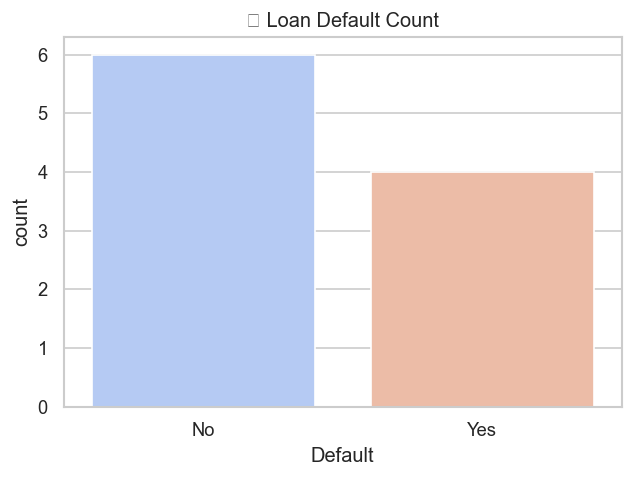

In [4]:
default_rate = df["Default"].value_counts(normalize=True) * 100
print("Default Rate (%)")
print(default_rate)

plt.figure(figsize=(6,4))
sns.countplot(x="Default", data=df, palette="coolwarm")
plt.title("📊 Loan Default Count")
plt.savefig("plots/default_rate.png", dpi=300, bbox_inches="tight")
plt.show()

# Loan Amount Trends (High vs Low Risk)

C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_17008\925627734.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Default", y="LoanAmount", data=df, palette="pastel")
C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_17008\925627734.py:4: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.savefig("plots/loan_amount_vs_default.png", dpi=300, bbox_inches="tight")
C:\Users\Farhan Diwan\anaconda3\envs\Farhanenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


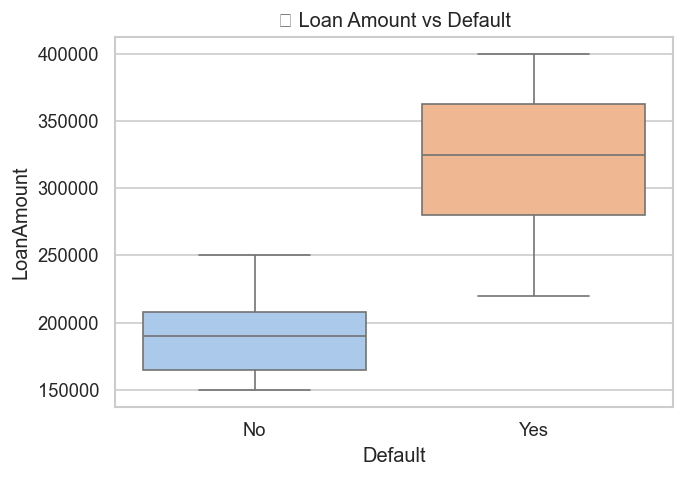

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Default", y="LoanAmount", data=df, palette="pastel")
plt.title("💰 Loan Amount vs Default")
plt.savefig("plots/loan_amount_vs_default.png", dpi=300, bbox_inches="tight")
plt.show()

# Credit Score Impact

C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_17008\1099037662.py:4: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig("plots/credit_vs_loan.png", dpi=300, bbox_inches="tight")
C:\Users\Farhan Diwan\anaconda3\envs\Farhanenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


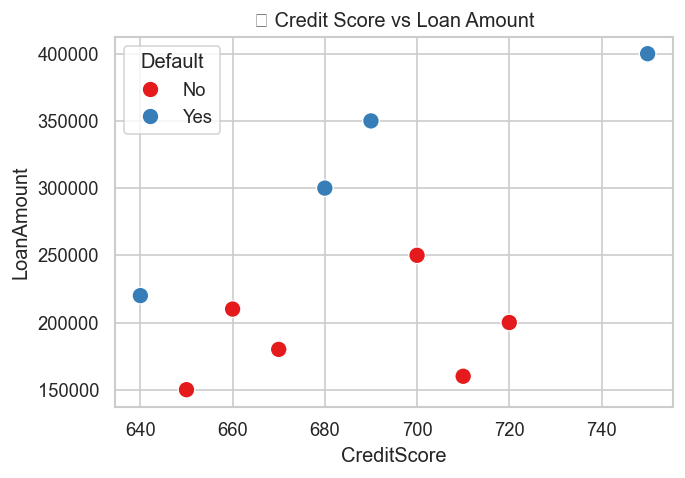

In [7]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="CreditScore", y="LoanAmount", hue="Default", data=df, palette="Set1", s=100)
plt.title("📈 Credit Score vs Loan Amount")
plt.savefig("plots/credit_vs_loan.png", dpi=300, bbox_inches="tight")
plt.show()

# Employment Status Effect

C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_17008\3980235578.py:4: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) Arial.
  plt.savefig("plots/employment_vs_default.png", dpi=300, bbox_inches="tight")
C:\Users\Farhan Diwan\anaconda3\envs\Farhanenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


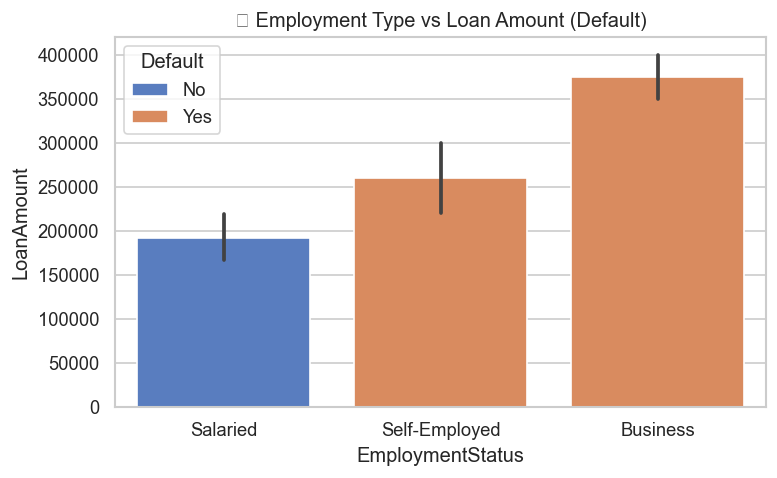

In [8]:
plt.figure(figsize=(7,4))
sns.barplot(x="EmploymentStatus", y="LoanAmount", hue="Default", data=df, palette="muted")
plt.title("🏢 Employment Type vs Loan Amount (Default)")
plt.savefig("plots/employment_vs_default.png", dpi=300, bbox_inches="tight")
plt.show()

# Repayment Patterns (Line Plot)

C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_17008\3881546436.py:5: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) Arial.
  plt.savefig("plots/monthly_repayments.png", dpi=300, bbox_inches="tight")
C:\Users\Farhan Diwan\anaconda3\envs\Farhanenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


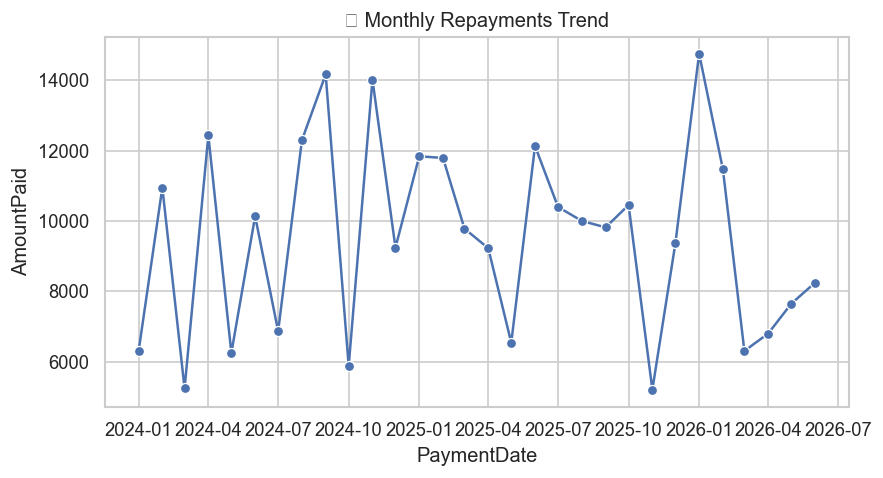

In [9]:
monthly_payments = payments.groupby("PaymentDate")["AmountPaid"].sum().reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(x="PaymentDate", y="AmountPaid", data=monthly_payments, marker="o")
plt.title("⏳ Monthly Repayments Trend")
plt.savefig("plots/monthly_repayments.png", dpi=300, bbox_inches="tight")
plt.show()

# Correlation Heatmap

C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_17008\2886739908.py:5: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.savefig("plots/correlation_heatmap.png", dpi=300, bbox_inches="tight")
C:\Users\Farhan Diwan\anaconda3\envs\Farhanenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


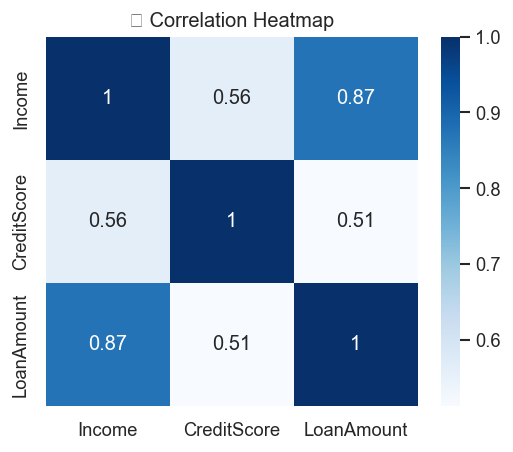

In [10]:
corr = df[["Income", "CreditScore", "LoanAmount"]].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("🔍 Correlation Heatmap")
plt.savefig("plots/correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

In [11]:
df.to_csv('bank_details_analysis.csv', index=False)
print("Data saved as bank_details_analysis.csv")

Data saved as bank_details_analysis.csv
